# Similarity Analysis

In [1]:
from IPython.display import display, Markdown
import numpy as np

from ydnpd import ALL_EXPERIMENTS, load_dataset, calc_dataset_similarity, plot_distribution_distances
from ydnpd.pretraining.analysis import get_category, extract_method_label, METHOD_ORDER
from additional import ADDITIONAL_EXPERIMENTS

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [2]:
def get_lable_tick(pointer):
    prefix, _ = pointer.split("/")
    category = get_category(pointer, prefix)
    if category is None:
        return "Private"
    method = extract_method_label({"public_data_pointer": pointer, "category": category})
    return method

## acs

Dim = 7
Total Dim = 116640


## total_variation

Private                                100.0
Public                                  48.5
Baseline (Domain)                        4.3
Baseline (Univariate)                   44.6
Arbitrary                                2.8
CSV (Claude 3.5 Sonnet)                 14.4
CSV (GPT-4o)                            25.7
CSV (Llama 3.3 70B)                     16.6
Agent (Claude 3.5 Sonnet, Unif.)        41.5
Agent (Claude 3.5 Sonnet, Max Cov.)     40.1
Agent (GPT-4o, Unif.)                   27.3
Agent (GPT-4o, Max Cov.)                27.4
Agent (Llama 3.3 70B, Unif.)            13.8
Agent (Llama 3.3 70B, Max Cov.)         10.3
Agent (Unif.)                           30.5
Agent (Max Cov.)                        24.6
Name: Private, dtype: float64

## 3_way_marginals

Private                                100.0
Public                                  50.4
Baseline (Domain)                        0.0
Baseline (Univariate)                   63.8
Arbitrary                                0.0
CSV (Claude 3.5 Sonnet)                 15.0
CSV (GPT-4o)                            30.2
CSV (Llama 3.3 70B)                     10.0
Agent (Claude 3.5 Sonnet, Unif.)        48.3
Agent (Claude 3.5 Sonnet, Max Cov.)     40.0
Agent (GPT-4o, Unif.)                   23.3
Agent (GPT-4o, Max Cov.)                20.4
Agent (Llama 3.3 70B, Unif.)             0.0
Agent (Llama 3.3 70B, Max Cov.)          0.0
Agent (Unif.)                           26.6
Agent (Max Cov.)                        15.7
Name: Private, dtype: float64

## edad

Dim = 11
Total Dim = 2188800


## total_variation

Private                                100.0
Public                                   4.9
Baseline (Domain)                        0.1
Baseline (Univariate)                    7.1
Arbitrary                                0.1
CSV (Claude 3.5 Sonnet)                  0.0
CSV (GPT-4o)                             0.0
CSV (Llama 3.3 70B)                      0.0
Agent (Claude 3.5 Sonnet, Unif.)         0.0
Agent (Claude 3.5 Sonnet, Max Cov.)      0.0
Agent (GPT-4o, Unif.)                    0.0
Agent (GPT-4o, Max Cov.)                 0.0
Agent (Llama 3.3 70B, Unif.)             0.0
Agent (Llama 3.3 70B, Max Cov.)          0.0
Agent (Unif.)                            0.0
Agent (Max Cov.)                         0.0
Name: Private, dtype: float64

## 3_way_marginals

Private                                100.0
Public                                  26.1
Baseline (Domain)                        0.0
Baseline (Univariate)                   66.7
Arbitrary                                0.0
CSV (Claude 3.5 Sonnet)                  0.0
CSV (GPT-4o)                            11.5
CSV (Llama 3.3 70B)                      0.0
Agent (Claude 3.5 Sonnet, Unif.)         5.5
Agent (Claude 3.5 Sonnet, Max Cov.)      6.8
Agent (GPT-4o, Unif.)                    7.2
Agent (GPT-4o, Max Cov.)                 6.9
Agent (Llama 3.3 70B, Unif.)             0.0
Agent (Llama 3.3 70B, Max Cov.)          0.0
Agent (Unif.)                            0.0
Agent (Max Cov.)                         0.0
Name: Private, dtype: float64

## we

Dim = 12
Total Dim = 1924560


## total_variation

Private                                100.0
Public                                   6.7
Baseline (Domain)                        0.2
Baseline (Univariate)                   15.4
Arbitrary                                0.0
CSV (Claude 3.5 Sonnet)                  0.0
CSV (GPT-4o)                             0.0
CSV (Llama 3.3 70B)                      0.0
Agent (Claude 3.5 Sonnet, Unif.)         0.0
Agent (Claude 3.5 Sonnet, Max Cov.)      0.0
Agent (GPT-4o, Unif.)                    0.0
Agent (GPT-4o, Max Cov.)                 0.0
Agent (Llama 3.3 70B, Unif.)             0.0
Agent (Llama 3.3 70B, Max Cov.)          0.0
Agent (Unif.)                            0.0
Agent (Max Cov.)                         0.0
Name: Private, dtype: float64

## 3_way_marginals

Private                                100.0
Public                                  34.1
Baseline (Domain)                        0.0
Baseline (Univariate)                   78.5
Arbitrary                                0.0
CSV (Claude 3.5 Sonnet)                 10.9
CSV (GPT-4o)                            14.2
CSV (Llama 3.3 70B)                      2.4
Agent (Claude 3.5 Sonnet, Unif.)        11.7
Agent (Claude 3.5 Sonnet, Max Cov.)      8.0
Agent (GPT-4o, Unif.)                    0.0
Agent (GPT-4o, Max Cov.)                 0.0
Agent (Llama 3.3 70B, Unif.)             0.0
Agent (Llama 3.3 70B, Max Cov.)          0.0
Agent (Unif.)                            0.0
Agent (Max Cov.)                         0.0
Name: Private, dtype: float64

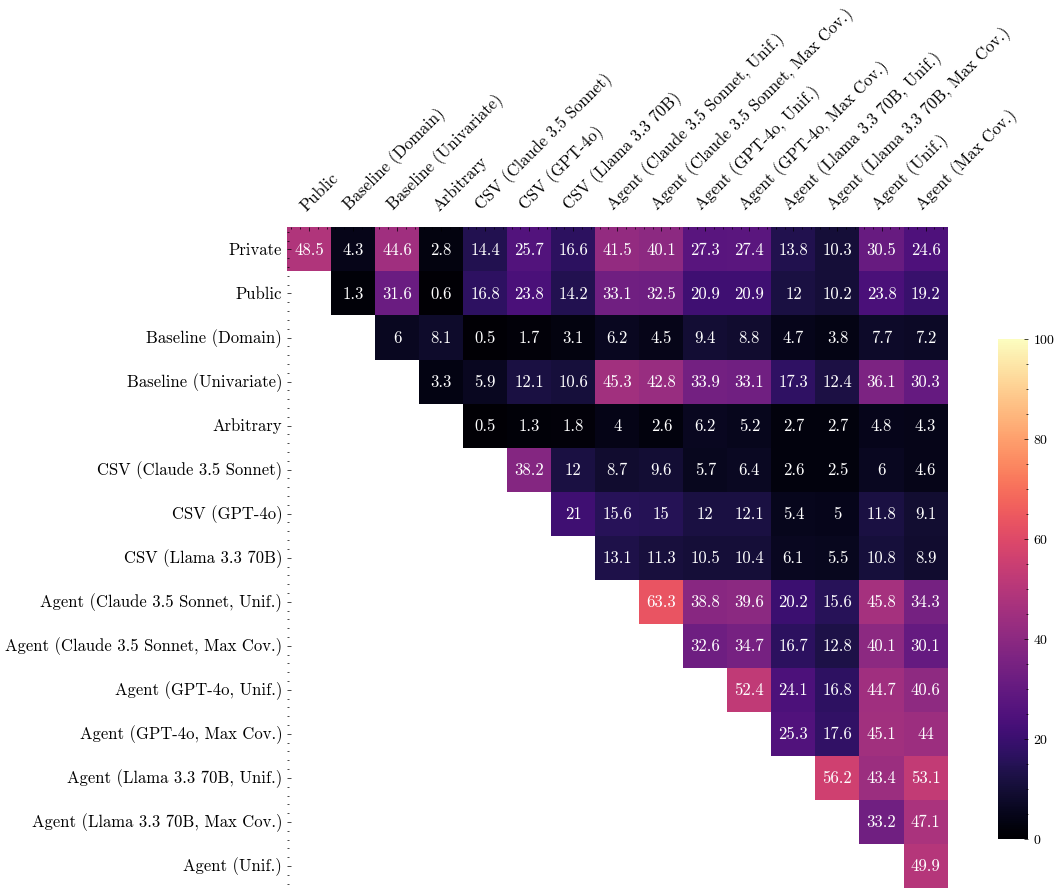

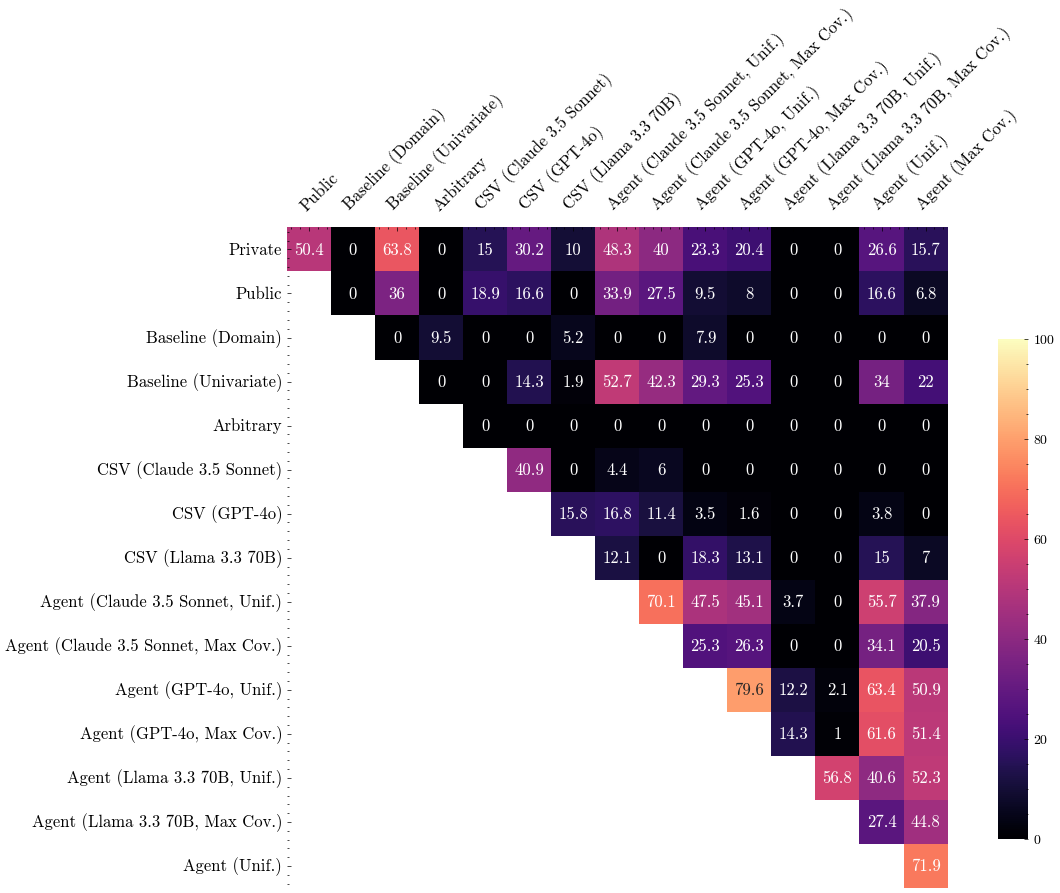

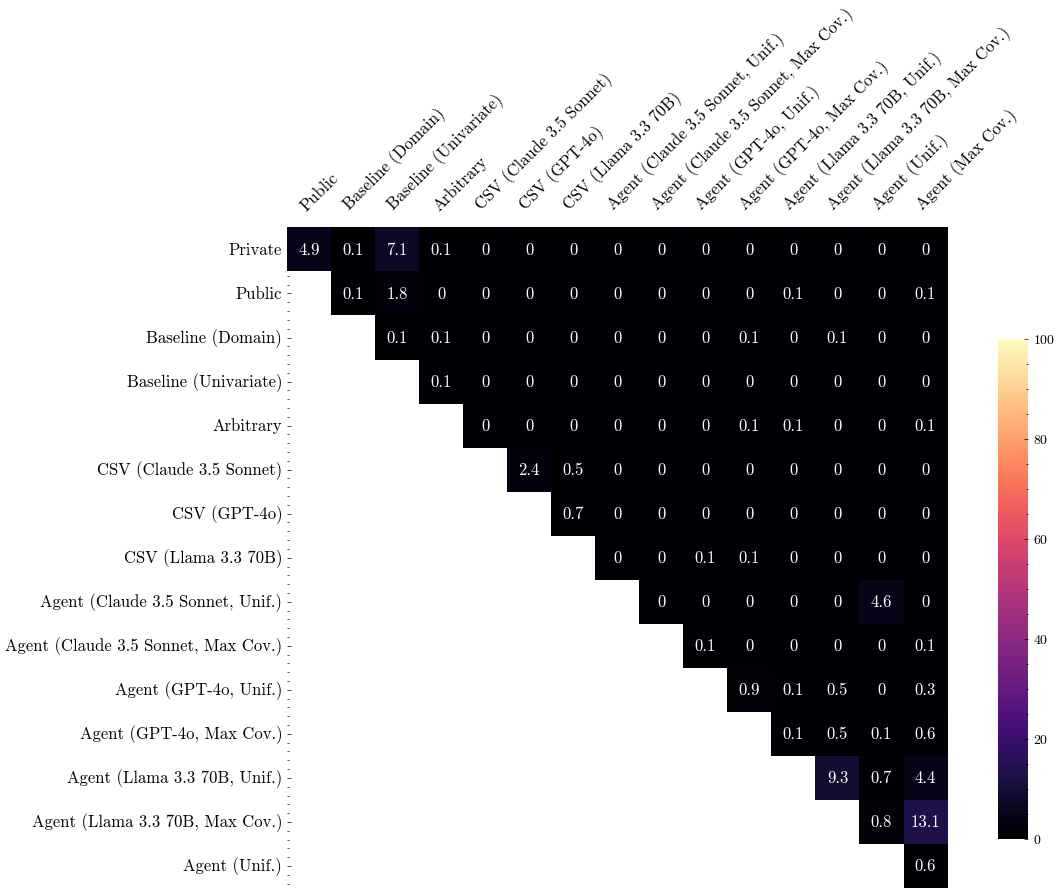

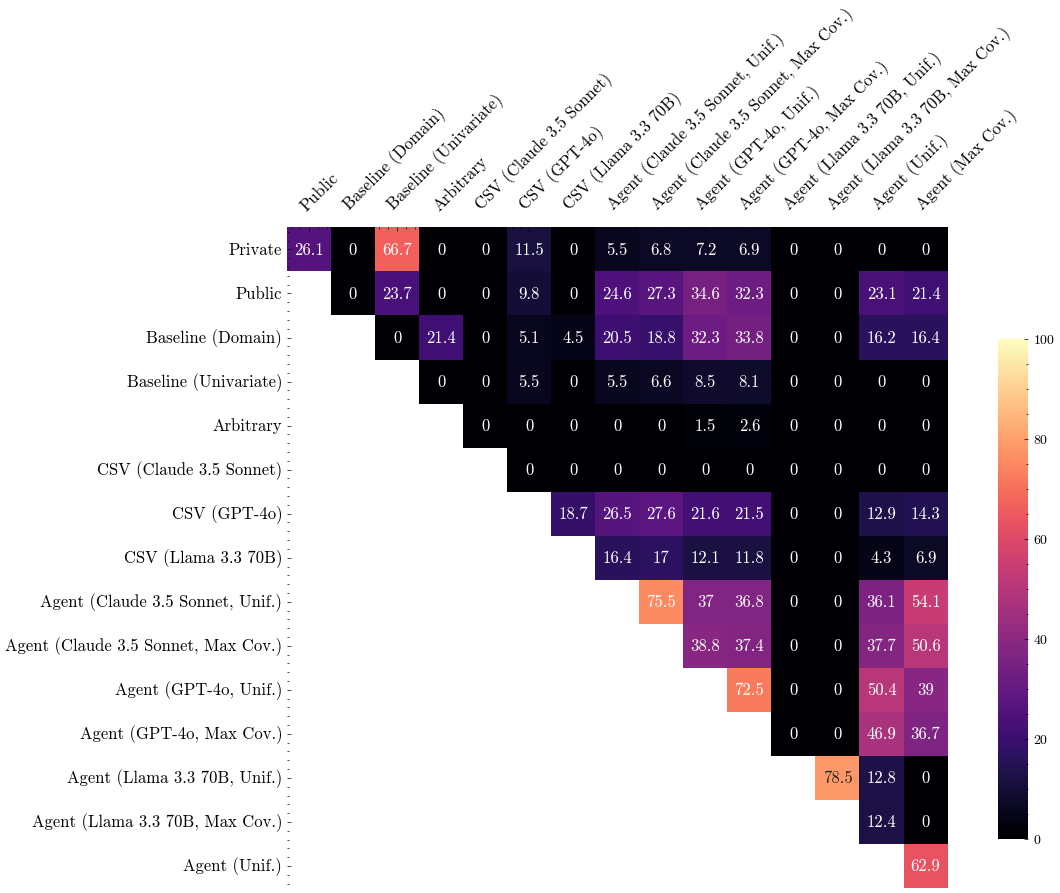

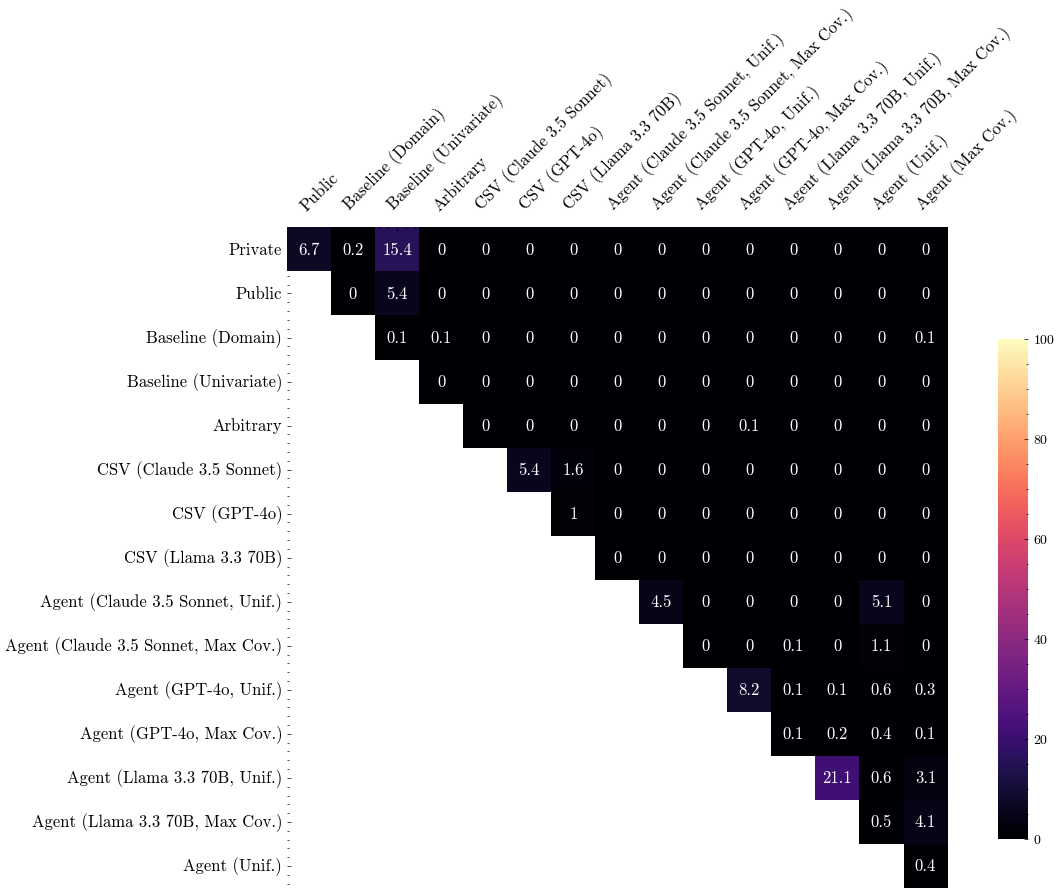

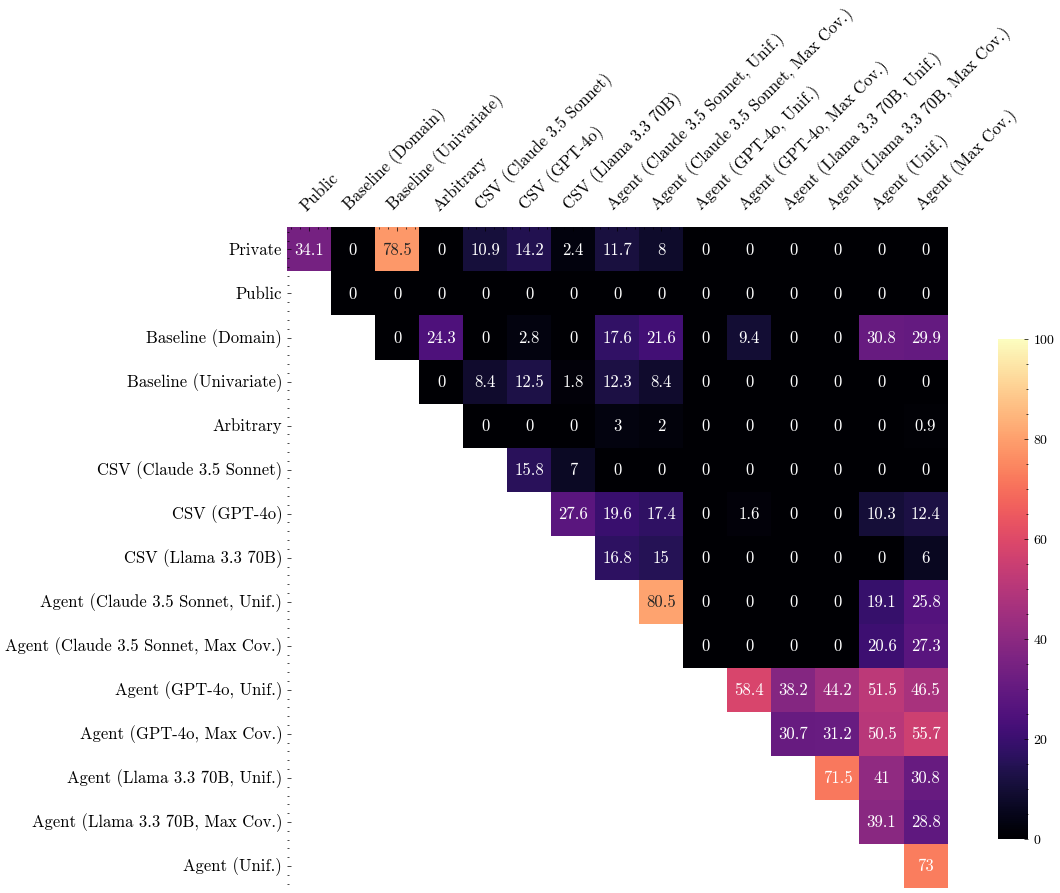

In [3]:
dataset_order = METHOD_ORDER.copy()
dataset_order.remove("Without pretraining")
dataset_order.insert(0, "Private")

for DATASET_FAMILY in ["acs", "edad", "we"]:

    private_dataset_pointer = [(ALL_EXPERIMENTS[DATASET_FAMILY].test_name,)]

    core_public_dataaset_pointers = [(name,) for name in ALL_EXPERIMENTS[DATASET_FAMILY].dev_names
                                    if name != ALL_EXPERIMENTS[DATASET_FAMILY].test_name]

    additional_public_dataaset_pointers = ADDITIONAL_EXPERIMENTS[DATASET_FAMILY]

    _, schema, _ = load_dataset(ALL_EXPERIMENTS[DATASET_FAMILY].test_name)

    datasets = {get_lable_tick(pointer[0]): load_dataset(*pointer)[0]
    for pointer in private_dataset_pointer + core_public_dataaset_pointers + additional_public_dataaset_pointers}

    datasets = {key: datasets[key] for key in dataset_order if key in datasets}
    
    display(Markdown(f"## {DATASET_FAMILY}"))
    print(f"Dim = {len(schema)}")
    print(f"Total Dim = {np.prod([len(col_schema['values']) for col_schema in schema.values()])}")

    for METRIC in ["total_variation", "3_way_marginals"]:
        display(Markdown(f"## {METRIC}"))
        display(calc_dataset_similarity(datasets, metric=METRIC).multiply(100).round(1).loc[:,"Private"].loc[dataset_order])
        g = plot_distribution_distances(datasets, with_clustering=False, metric=METRIC)
        g.savefig(f"plots/similarity_{DATASET_FAMILY}_{METRIC}.pdf", dpi=300)
        